In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [178]:
df_data = pd.read_csv("Raw_Youtube_API_DATA.csv")
df_data.head()


,channel_id,channel_name,channel_start_date,inception_date,total_no_of_videos,total_no_short_videos,total_no_long_videos,total_views,total_likes,total_comments,total_subscribers
0,UCCezIgC97PvUuR4_gbFUs5g,Corey Schafer,2006-05-31,2006-05-31,238,5,234,97548444,2083339,87679,1350000
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,2010-04-29,2010-04-29,4784,14,4572,29388895252,1261097598,87183228,111000000
2,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,2016-11-15,2016-11-15,7224,370,6856,27651787565,262028125,6052277,80800000
3,UC7btqG2Ww0_2LwuQxpvo2HQ,ProgrammingWithHarry,2019-06-12,2020-01-01,108,6,62,6248831,117256,6918,260000
4,UCjWY5hREA6FFYrthD0rZNIw,Krish Naik Hindi,2017-12-04,2020-01-01,472,6,465,6255022,180390,9439,111000


In [179]:
df_data['total_views'] = pd.to_numeric(df_data['total_views'], errors="coerce")
df_data['total_likes'] = pd.to_numeric(df_data['total_likes'], errors="coerce")
df_data['total_comments'] = pd.to_numeric(df_data['total_comments'], errors="coerce")
df_data['total_subscribers'] = pd.to_numeric(df_data['total_subscribers'], errors="coerce")
df_data['total_no_of_videos'] = pd.to_numeric(df_data['total_no_of_videos'], errors="coerce")
df_data['total_no_short_videos'] = pd.to_numeric(df_data['total_no_short_videos'], errors="coerce")
df_data['total_no_long_videos'] = pd.to_numeric(df_data['total_no_long_videos'], errors="coerce")

In [180]:
df_data.shape

(108, 11)

In [181]:
null_rows = df_data[df_data.isnull().any(axis=1)]
print(null_rows)
df_data.isnull().sum()

Empty DataFrame
Columns: [channel_id, channel_name, channel_start_date, inception_date, total_no_of_videos, total_no_short_videos, total_no_long_videos, total_views, total_likes, total_comments, total_subscribers]
Index: []


channel_id               0
channel_name             0
channel_start_date       0
inception_date           0
total_no_of_videos       0
total_no_short_videos    0
total_no_long_videos     0
total_views              0
total_likes              0
total_comments           0
total_subscribers        0
dtype: int64

In [182]:
df_data['channel_start_date'] = pd.to_datetime(df_data['channel_start_date'], errors="coerce")
df_data['inception_date'] = pd.to_datetime(df_data['inception_date'], errors="coerce")

In [183]:
# Set reference date to now in UTC
reference_date = pd.to_datetime(pd.Timestamp.now()).tz_localize('UTC')
# Convert the channel start date and inception date to UTC
df_data['channel_start_date'] = pd.to_datetime(df_data['channel_start_date']).dt.tz_localize('UTC')
df_data['inception_date'] = pd.to_datetime(df_data['inception_date']).dt.tz_localize('UTC')
# Now calculate days since start and inception
df_data['days_since_start'] = (reference_date - df_data['channel_start_date']).dt.days
df_data['days_since_inception'] = (reference_date - df_data['inception_date']).dt.days

In [184]:
df_data.describe()

,total_no_of_videos,total_no_short_videos,total_no_long_videos,total_views,total_likes,total_comments,total_subscribers,days_since_start,days_since_inception
count,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00,108.00
mean,1536.51,324.59,479.74,8376776792.10,96887606.39,1899692.53,19641858.89,3214.80,1341.67
std,2759.15,596.01,1159.81,16344659063.91,248810852.72,8672690.03,38984512.49,2094.14,851.08
min,6.00,0.00,0.00,43387.00,1373.00,0.00,1820.00,78.00,646.00
25%,222.75,27.50,31.75,242937046.75,3222977.00,17663.75,1104500.00,1555.25,646.00
50%,451.50,111.50,111.00,1593390566.50,20008272.00,205920.50,4065000.00,2903.00,1742.00
75%,1396.50,348.75,326.00,6516689623.25,76852278.50,969480.00,20750000.00,4752.75,1742.00
max,20043.00,3419.00,6856.00,105537213502.00,1484431086.00,87183228.00,314000000.00,7054.00,6705.00


In [185]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   channel_id             108 non-null    object             
 1   channel_name           108 non-null    object             
 2   channel_start_date     108 non-null    datetime64[ns, UTC]
 3   inception_date         108 non-null    datetime64[ns, UTC]
 4   total_no_of_videos     108 non-null    int64              
 5   total_no_short_videos  108 non-null    int64              
 6   total_no_long_videos   108 non-null    int64              
 7   total_views            108 non-null    int64              
 8   total_likes            108 non-null    int64              
 9   total_comments         108 non-null    int64              
 10  total_subscribers      108 non-null    int64              
 11  days_since_start       108 non-null    int64              

SELECTKBEST Feature for DATASET

In [186]:
x = df_data.drop(['channel_id', 'channel_name', 'channel_start_date', 'inception_date', 'total_subscribers'], axis=1)
y = df_data['total_subscribers']

In [187]:
best_feature = SelectKBest(score_func = chi2, k = 11)
fit = best_feature.fit(x, y)


/Users/anjalijha/Python/youtubeapidata/youtube_api/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=11 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [188]:
score_df = pd.DataFrame(fit.scores_, columns=['score'])
column_df = pd.DataFrame(x.columns, columns=['Feature'])

In [189]:
feature_score_df = pd.concat([column_df, score_df], axis=1)
# Convert the 'score' column to numeric
feature_score_df['score'] = pd.to_numeric(feature_score_df['score'])
pd.set_option('display.float_format', '{:.2f}'.format)
# Display the DataFrame
print(feature_score_df)

                 Feature            score
0     total_no_of_videos        518659.62
1  total_no_short_videos        105942.25
2   total_no_long_videos        293826.07
3            total_views 3412277169544.43
4            total_likes   68318220471.62
5         total_comments    4235726297.52
6       days_since_start        141121.61
7   days_since_inception         57319.59


HIGHER THE SCORE = More important the feature is!

total_views, total_likes, total_comments are the most important features in predicting the number of subscribers.

In [190]:
print(feature_score_df.nlargest(8, 'score'))

                 Feature            score
3            total_views 3412277169544.43
4            total_likes   68318220471.62
5         total_comments    4235726297.52
0     total_no_of_videos        518659.62
2   total_no_long_videos        293826.07
6       days_since_start        141121.61
1  total_no_short_videos        105942.25
7   days_since_inception         57319.59


In [191]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)
var.fit(x)

VarianceThreshold(threshold=0)

In [192]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

If there is False for a feature it means that feature has constant value and is useless for prediction.

In [193]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [194]:
correlation(x, 0.6)

{'total_comments', 'total_no_long_videos'}

In [195]:
x.corr()

,total_no_of_videos,total_no_short_videos,total_no_long_videos,total_views,total_likes,total_comments,days_since_start,days_since_inception
total_no_of_videos,1.00,0.31,0.74,0.24,0.13,0.19,0.22,0.08
total_no_short_videos,0.31,1.00,0.13,0.26,0.36,0.05,-0.16,-0.17
total_no_long_videos,0.74,0.13,1.00,0.31,0.19,0.40,0.12,0.34
total_views,0.24,0.26,0.31,1.00,0.55,0.27,0.24,0.20
total_likes,0.13,0.36,0.19,0.55,1.00,0.64,0.04,0.21
total_comments,0.19,0.05,0.40,0.27,0.64,1.00,0.14,0.46
days_since_start,0.22,-0.16,0.12,0.24,0.04,0.14,1.00,0.46
days_since_inception,0.08,-0.17,0.34,0.20,0.21,0.46,0.46,1.00


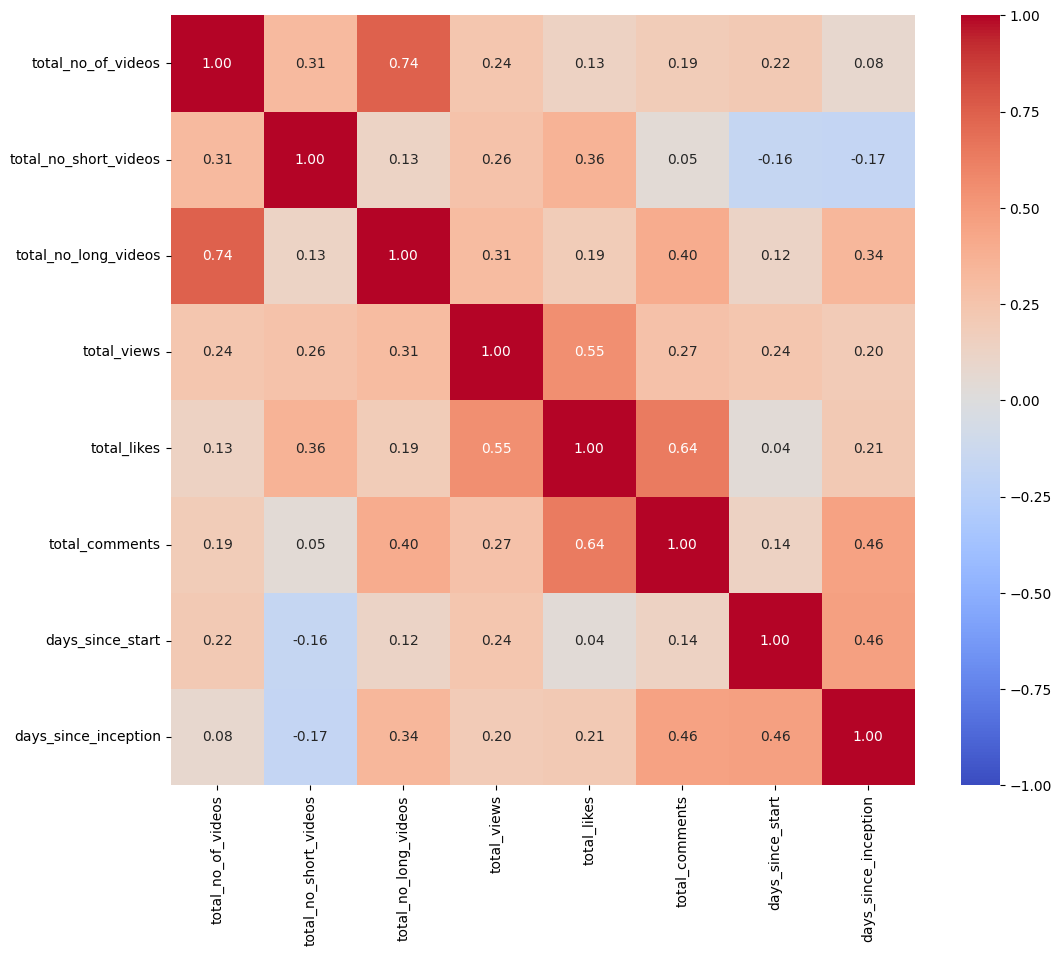

In [196]:
plt.figure(figsize=(12, 10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.show()

Mutual information 

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mi = mutual_info_regression(X_train, y_train)

In [198]:
mi

array([0.04503344, 0.11281991, 0.09537835, 0.88693062, 0.26591513,
       0.46335218, 0.11522694, 0.02395797])

In [199]:
mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False)

total_views             0.89
total_comments          0.46
total_likes             0.27
days_since_start        0.12
total_no_short_videos   0.11
total_no_long_videos    0.10
total_no_of_videos      0.05
days_since_inception    0.02
dtype: float64

In [175]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=9, random_state=29)
rf.fit(X_train[['total_views', 'total_comments', 'total_likes', 'days_since_start']], y_train)

RandomForestRegressor(n_estimators=9, random_state=29)

In [176]:
rf.score(X_test[['total_views', 'total_comments', 'total_likes', 'days_since_start']], y_test)

0.6561919219600885